#PhlyGreen Tutorial 

Import packages

In [2]:
import sys
sys.path.insert(0,'../')
import PhlyGreen as pg
import numpy as np
import matplotlib.pyplot as plt
import PhlyGreen.Utilities.Units as Units
import scienceplots

plt.style.use(['science', 'ieee', 'high-vis'])



Create instances of subsystems. Each one of those requires an Aircraft object as argument. By passing (None) as argument, we are creating empty objects (for the moment).

In [3]:
powertrain = pg.Systems.Powertrain.Powertrain(None)
structures = pg.Systems.Structures.Structures(None)
aerodynamics = pg.Systems.Aerodynamics.Aerodynamics(None)
performance = pg.Performance.Performance(None)
mission = pg.Mission.Mission(None)
weight = pg.Weight.Weight(None)
constraint = pg.Constraint.Constraint(None)
welltowake = pg.WellToWake.WellToWake(None)
battery = pg.Systems.Battery.Battery(None)
climateimpact = pg.ClimateImpact.ClimateImpact(None)

Create instance of Aircraft object.

In [4]:
myaircraft = pg.Aircraft(powertrain, structures, aerodynamics, performance, mission, weight, constraint, welltowake, battery, climateimpact)

Create the connections with its subsystems.

In [5]:
powertrain.aircraft = myaircraft
structures.aircraft = myaircraft
aerodynamics.aircraft = myaircraft
mission.aircraft = myaircraft
performance.aircraft = myaircraft
weight.aircraft = myaircraft
constraint.aircraft = myaircraft
welltowake.aircraft = myaircraft
battery.aircraft = myaircraft
climateimpact.aircraft = myaircraft

Define input dictionaries

In [6]:
ConstraintsInput = {'DISA': 0.,
                    'Cruise': {'Speed': 0.5, 'Speed Type':'Mach', 'Beta': 0.95, 'Altitude': 8000.},
                    'AEO Climb': {'Speed': 210, 'Speed Type':'KCAS', 'Beta': 0.97, 'Altitude': 6000., 'ROC': 5},
                    'OEI Climb': {'Speed': 1.2*34.5, 'Speed Type': 'TAS', 'Beta': 1., 'Altitude': 0., 'Climb Gradient': 0.021},
                    'Take Off': {'Speed': 90, 'Speed Type': 'TAS', 'Beta': 1., 'Altitude': 100., 'kTO': 1.2, 'sTO': 950},
                    'Landing':{'Speed': 59., 'Speed Type': 'TAS', 'Altitude': 500.},
                    'Turn':{'Speed': 210, 'Speed Type': 'KCAS', 'Beta': 0.9, 'Altitude': 5000, 'Load Factor': 1.1},
                    'Ceiling':{'Speed': 0.5, 'Beta': 0.8, 'Altitude': 9500, 'HT': 0.5},
                    'Acceleration':{'Mach 1': 0.3, 'Mach 2':0.4, 'DT': 180, 'Altitude': 6000, 'Beta': 0.9}}

In [7]:
MissionInput = {'Range Mission': 750,  #nautical miles
                'Range Diversion': 220,  #nautical miles
                'Beta start': 0.97,
                'Payload Weight': 4560,  #Kg
                'Crew Weight': 500}  #Kg

In [8]:
MissionStages = {'Takeoff': {'Supplied Power Ratio':{'phi': 0.}},
                'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB': 0.16, 'Speed': 77, 'StartAltitude': 100, 'EndAltitude': 1500}, 'Supplied Power Ratio':{'phi_start': 0, 'phi_end':0.2}},
                 'Climb2': {'type': 'ConstantRateClimb', 'input': {'CB': 0.08, 'Speed': 120, 'StartAltitude': 1500, 'EndAltitude': 4500}, 'Supplied Power Ratio':{'phi_start': 0.2, 'phi_end':0.2 }},
                 'Climb3': {'type': 'ConstantRateClimb', 'input': {'CB': 0.07, 'Speed': 125, 'StartAltitude': 4500, 'EndAltitude': 8000}, 'Supplied Power Ratio':{'phi_start': 0.2, 'phi_end':0.2 }},
                 'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': 0.4, 'Altitude': 8000}, 'Supplied Power Ratio':{'phi_start': 0.5, 'phi_end':0.5}},
                 'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.04, 'Speed': 90, 'StartAltitude': 8000, 'EndAltitude': 200}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}

DiversionStages = {'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB': 0.08, 'Speed': 110, 'StartAltitude': 200, 'EndAltitude': 3100}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': 0.35, 'Altitude': 3100}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0}},
                 'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.04, 'Speed': 90, 'StartAltitude': 3100, 'EndAltitude': 200}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}


In [9]:
EnergyInput = {'Ef': 43.5*10**6,
                   'Contingency Fuel': 130,
                   'Ebat': 700 * 3600,
                   'pbat': 1000,
                   'Eta Gas Turbine': 0.22,
                   'Eta Propulsive Model': 'Hamilton',
                   'Eta Gearbox': 0.96,
                   'Eta Propulsive': 0.9,
                   'Eta Electric Motor 1': 0.96,    #for serial config
                   'Eta Electric Motor 2': 0.96,    #for serial config
                   'Eta Electric Motor': 0.98,      #for parallel config
                   'Eta PMAD': 0.99,
                   'Specific Power Powertrain': [3900,7700],
                   'Specific Power PMAD': [2200,2200,2200],
                   'PowertoWeight Battery': 35, 
                   'PowertoWeight Powertrain': [150,33],
                   'PowertoWeight PMAD': 0
                   }

In [10]:
CellInput = {
    'Class': "II",
    'Model':'Finger-Cell-Thermal',
    'SpecificPower': 8000,
    'SpecificEnergy': 1500,
    'Minimum SOC': 0.2,
    'Pack Voltage':800,
    'Initial temperature': 25,
    'Max operative temperature':50,
    'Ebat': 1000 * 3600, # PhlyGreen uses this input only if Class == 'I'
    'pbat': 1000
    }

In [11]:
AerodynamicsInput = {'AnalyticPolar': {'type': 'Quadratic', 'input': {'AR': 11, 'e_osw': 0.8}},
                    'Take Off Cl': 1.9,
                     'Landing Cl': 1.9,
                     'Minimum Cl': 0.20,
                     'Cd0': 0.017}


PropellerInput = {'Propeller Diameter': Units.ftTom(13),
                  'RPM': 13820/13, # JUST AN ESTIMATION FOR DEBUGGING, 
                  'N_ENGINES': 2.,
                  'N_BLADES': 6,
                  'ACTIVITY_FACTOR': 167,
                  'INTEGRATED_LIFT_COEFFICIENT': 0.5
                  } 


In [12]:
WellToTankInput = {'Eta Charge': 0.95,
                   'Eta Grid': 1.,
                   'Eta Extraction': 1.,
                   'Eta Production': 1.,
                   'Eta Transportation': 0.25}

ClimateImpactInput = {'H': 100, 'N':1.6e7, 'Y':30, 'EINOx_model':'Filippone', 'WTW_CO2': 8.30e-3, 'Grid_CO2': 9.36e-2}

Import input dictionaries

In [13]:
myaircraft.ConstraintsInput = ConstraintsInput
myaircraft.AerodynamicsInput = AerodynamicsInput
myaircraft.MissionInput = MissionInput
myaircraft.MissionStages = MissionStages
myaircraft.DiversionStages = DiversionStages
myaircraft.EnergyInput = EnergyInput
myaircraft.CellInput = CellInput
myaircraft.WellToTankInput = WellToTankInput
myaircraft.ClimateImpactInput = ClimateImpactInput
myaircraft.PropellerInput = PropellerInput

Set aircraft power configuration

In [14]:
myaircraft.Configuration = 'Hybrid'
# myaircraft.Configuration = 'Traditional'
myaircraft.HybridType = 'Parallel'
myaircraft.AircraftType = 'ATR'

Set inputs

In [15]:
# Initialize Constraint Analysis
myaircraft.constraint.SetInput()

# Initialize Mission profile and Analysis
myaircraft.mission.InitializeProfile()
myaircraft.mission.SetInput()

# Initialize Aerodynamics subsystem
myaircraft.aerodynamics.SetInput()

# Initialize Powertrain
myaircraft.powertrain.SetInput()

# Initialize Weight Estimator
myaircraft.weight.Class = 'I'

from FLOPS_input import FLOPS_input
myaircraft.FLOPSInput = FLOPS_input

myaircraft.weight.SetInput()

#Initialize Battery Configurator
myaircraft.battery.SetInput()

#Initialized Well to Tank
myaircraft.welltowake.SetInput()

# Initialize Climate Impace Estimator
myaircraft.climateimpact.SetInput()

Either run the Constraint Analysis....

In [16]:
myaircraft.constraint.FindDesignPoint()
print('----------------------------------------')
print('Design W/S: ',myaircraft.DesignWTOoS)
print('Design P/W: ',myaircraft.DesignPW)
print('----------------------------------------')

----------------------------------------
Design W/S:  3293.8228228228227
Design P/W:  194.90567908431782
----------------------------------------


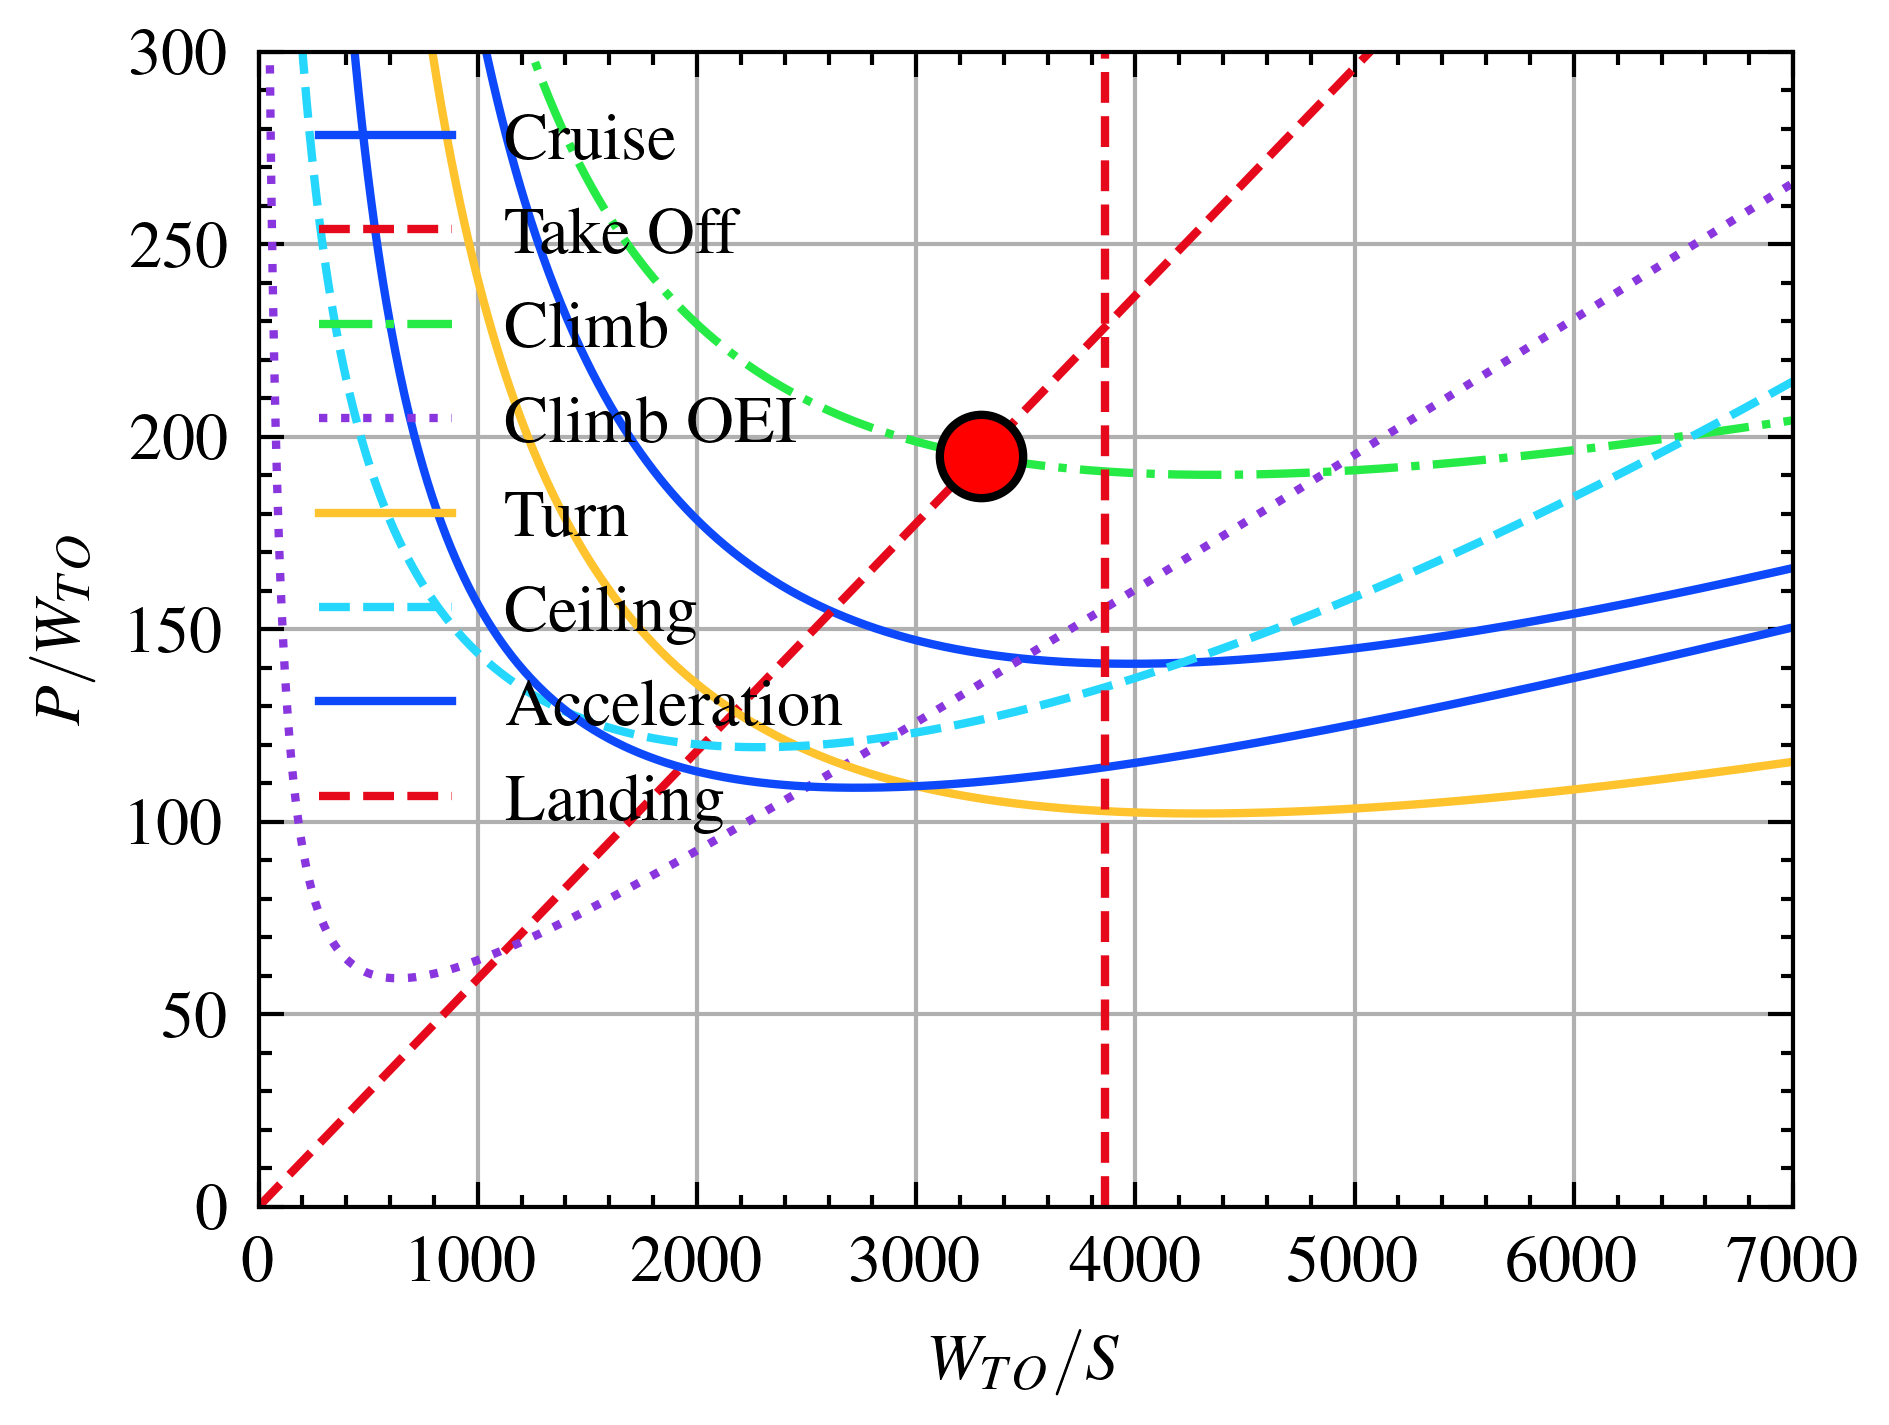

In [17]:
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWCruise, label='Cruise')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWTakeOff, label='Take Off')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWAEOClimb, label='Climb')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWOEIClimb, label='Climb OEI')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWTurn, label='Turn')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWCeiling, label='Ceiling')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWAcceleration, label='Acceleration')
plt.plot(myaircraft.constraint.WTOoSLanding,myaircraft. constraint.PWLanding, label='Landing')
plt.plot(myaircraft.DesignWTOoS, myaircraft.DesignPW, marker='o', markersize = 10, markerfacecolor = 'red', markeredgecolor = 'black')
# plt.plot(performance.WTOoSTorenbeek, performance.PWTorenbeek, label='Torenbeek')
plt.ylim([0, 300])
plt.xlim([0, 7000])
plt.legend()
plt.grid(visible=True)
plt.xlabel('$W_{TO}/S$')
plt.ylabel('$P/W_{TO}$')
plt.show()

... or assign a wing loading

In [18]:
# myaircraft.DesignWTOoS = 3323

Run Mission analysis to define the aircraft's masses

In [19]:
myaircraft.weight.WeightEstimation()

max=126 and min=124
Optimal n 125
max=502 and min=500
Optimal n 501
max=361 and min=359
Optimal n 360
max=290 and min=289
Optimal n 290
max=312 and min=310
Optimal n 311
max=310 and min=309
Optimal n 310
max=310 and min=309
Optimal n 310
max=310 and min=309
Optimal n 310
max=310 and min=309
Optimal n 310


Wing surface can be readily estimated as S = WTO/(WTO/S)

In [20]:
myaircraft.WingSurface = myaircraft.weight.WTO / myaircraft.DesignWTOoS * 9.81

if (myaircraft.Configuration == 'Hybrid' and WellToTankInput is not None):
    myaircraft.welltowake.EvaluateSource()

A summary of the preliminary design:

In [21]:
print('Fuel mass (trip + altn) [Kg]: ', myaircraft.weight.Wf)
print('Block Fuel mass [Kg]:         ', myaircraft.weight.Wf + myaircraft.weight.final_reserve)
if myaircraft.Configuration == 'Hybrid':
    print('Battery mass [Kg]:            ', myaircraft.weight.WBat)
    print('Structure [Kg]:               ', myaircraft.weight.WStructure)
    print('Powertrain mass [Kg]:         ', myaircraft.weight.WPT)
    print('Empty Weight [Kg]:            ', myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew + myaircraft.weight.WBat)
    print('Zero Fuel Weight [Kg]:        ', myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew + myaircraft.weight.WBat + myaircraft.weight.WPayload)
else:
    print('Structure [Kg]:               ', myaircraft.weight.WStructure)
    print('Powertrain mass [Kg]:         ', myaircraft.weight.WPT)
    print('Empty Weight [Kg]:            ', myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew)
    print('Zero Fuel Weight [Kg]:        ', myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew + myaircraft.weight.WPayload)

print('----------------------------------------')
print('Takeoff Weight: ', myaircraft.weight.WTO)
if myaircraft.WellToTankInput is not None and myaircraft.Configuration == 'Hybrid':
    print('Source Energy: ', myaircraft.welltowake.SourceEnergy/1.e6,' MJ')
    print('Psi: ', myaircraft.welltowake.Psi)
print('Wing Surface: ', myaircraft.WingSurface, ' m^2')
print('TakeOff engine shaft peak power [kW]:      ', myaircraft.mission.TO_PP/1000.)
print('Climb/cruise engine shaft peak power [kW]: ', myaircraft.mission.Max_PEng/1000.)
print('TakeOff battery peak power [kW]:           ', myaircraft.mission.TO_PBat/1000.)
print('Climb/cruise battery peak power [kW]:      ', myaircraft.mission.Max_PBat/1000.)
if myaircraft.Configuration == 'Hybrid':
    if myaircraft.battery.BatteryClass == 'II':
        print('-------------Battery Specs-------------')
        print('Battery Pack Energy [kWh]:           ', myaircraft.battery.pack_energy/1000)
        print('Battery Pack Max Power [kW]:         ', myaircraft.battery.pack_power_max/1000)
        print('Battery Pack Specific Energy [Wh/kg]:',(myaircraft.battery.pack_energy)/myaircraft.weight.WBat)
        print('Battery Pack Specific Power [kW/kg]: ',(myaircraft.battery.pack_power_max/1000)/myaircraft.weight.WBat)
        print('Battery Configuration: ', f"S{myaircraft.battery.S_number} P{myaircraft.battery.P_number}" )

print('-------------Sizing Phase--------------')
#print('Sizing phase for battery: ', 'Cruise energy' if myaircraft.battery.energy_or_power == 'energy' else 'Cruise peak power' if myaircraft.weight.TOPwr_or_CruisePwr == 'cruise' else 'Takeoff peak power'  ) #uncomment when i add a mechanism for seeing which constraint drove what thing in the battery sizing
print('Sizing phase for thermal powertrain ', 'Climb/Cruise peak power' if myaircraft.mission.Max_PEng > myaircraft.mission.TO_PP else 'Takeoff peak power'  )
# print('Sizing phase for electric powertrain ', 'Climb/Cruise peak power' if myaircraft.mission.Max_PBat > myaircraft.mission.TO_PBat else 'Takeoff peak power'  )

Fuel mass (trip + altn) [Kg]:  1575.101938590124
Block Fuel mass [Kg]:          1705.101938590124
Battery mass [Kg]:             4181.9
Structure [Kg]:                15687.54896983659
Powertrain mass [Kg]:          2429.532462067619
Empty Weight [Kg]:             22798.981431904205
Zero Fuel Weight [Kg]:         27358.981431904205
----------------------------------------
Takeoff Weight:  29064.073525380867
Source Energy:  293647.91275547846  MJ
Psi:  0.06667908944784948
Wing Surface:  86.56159624264133  m^2
TakeOff engine shaft peak power [kW]:       7637.952592781638
Climb/cruise engine shaft peak power [kW]:  6368.423150522459
TakeOff battery peak power [kW]:            0.0
Climb/cruise battery peak power [kW]:       3627.339710633839
-------------Battery Specs-------------
Battery Pack Energy [kWh]:            6272.849999999999
Battery Pack Max Power [kW]:          33464.020236608005
Battery Pack Specific Energy [Wh/kg]: 1500.0
Battery Pack Specific Power [kW/kg]:  8.00210914574906

Some plots:

In [36]:
times = np.array([])
Ef    = np.array([])
Ebat  = np.array([])
beta  = np.array([])
soc   = np.array([])
temp  = np.array([])
for array in mission.integral_solution:
    times = np.concatenate([times, array.t])
    Ef    = np.concatenate([Ef   , array.y[0]])
    # Ebat  = np.concatenate([Ebat , array.y[1]])
    beta  = np.concatenate([beta , array.y[2]])
    temp  = np.concatenate([temp, array.y[-1]]) 

print(len(beta))

toplot = np.array(mission.plottingVars)
soc   = toplot[:, 1]
v_oc  = toplot[:, 2]
v_out = toplot[:, 3]
curr  = toplot[:, 4]
temp  = toplot[:, 5]
atemp = toplot[:, 6]
alt   = toplot[:, 7]

317


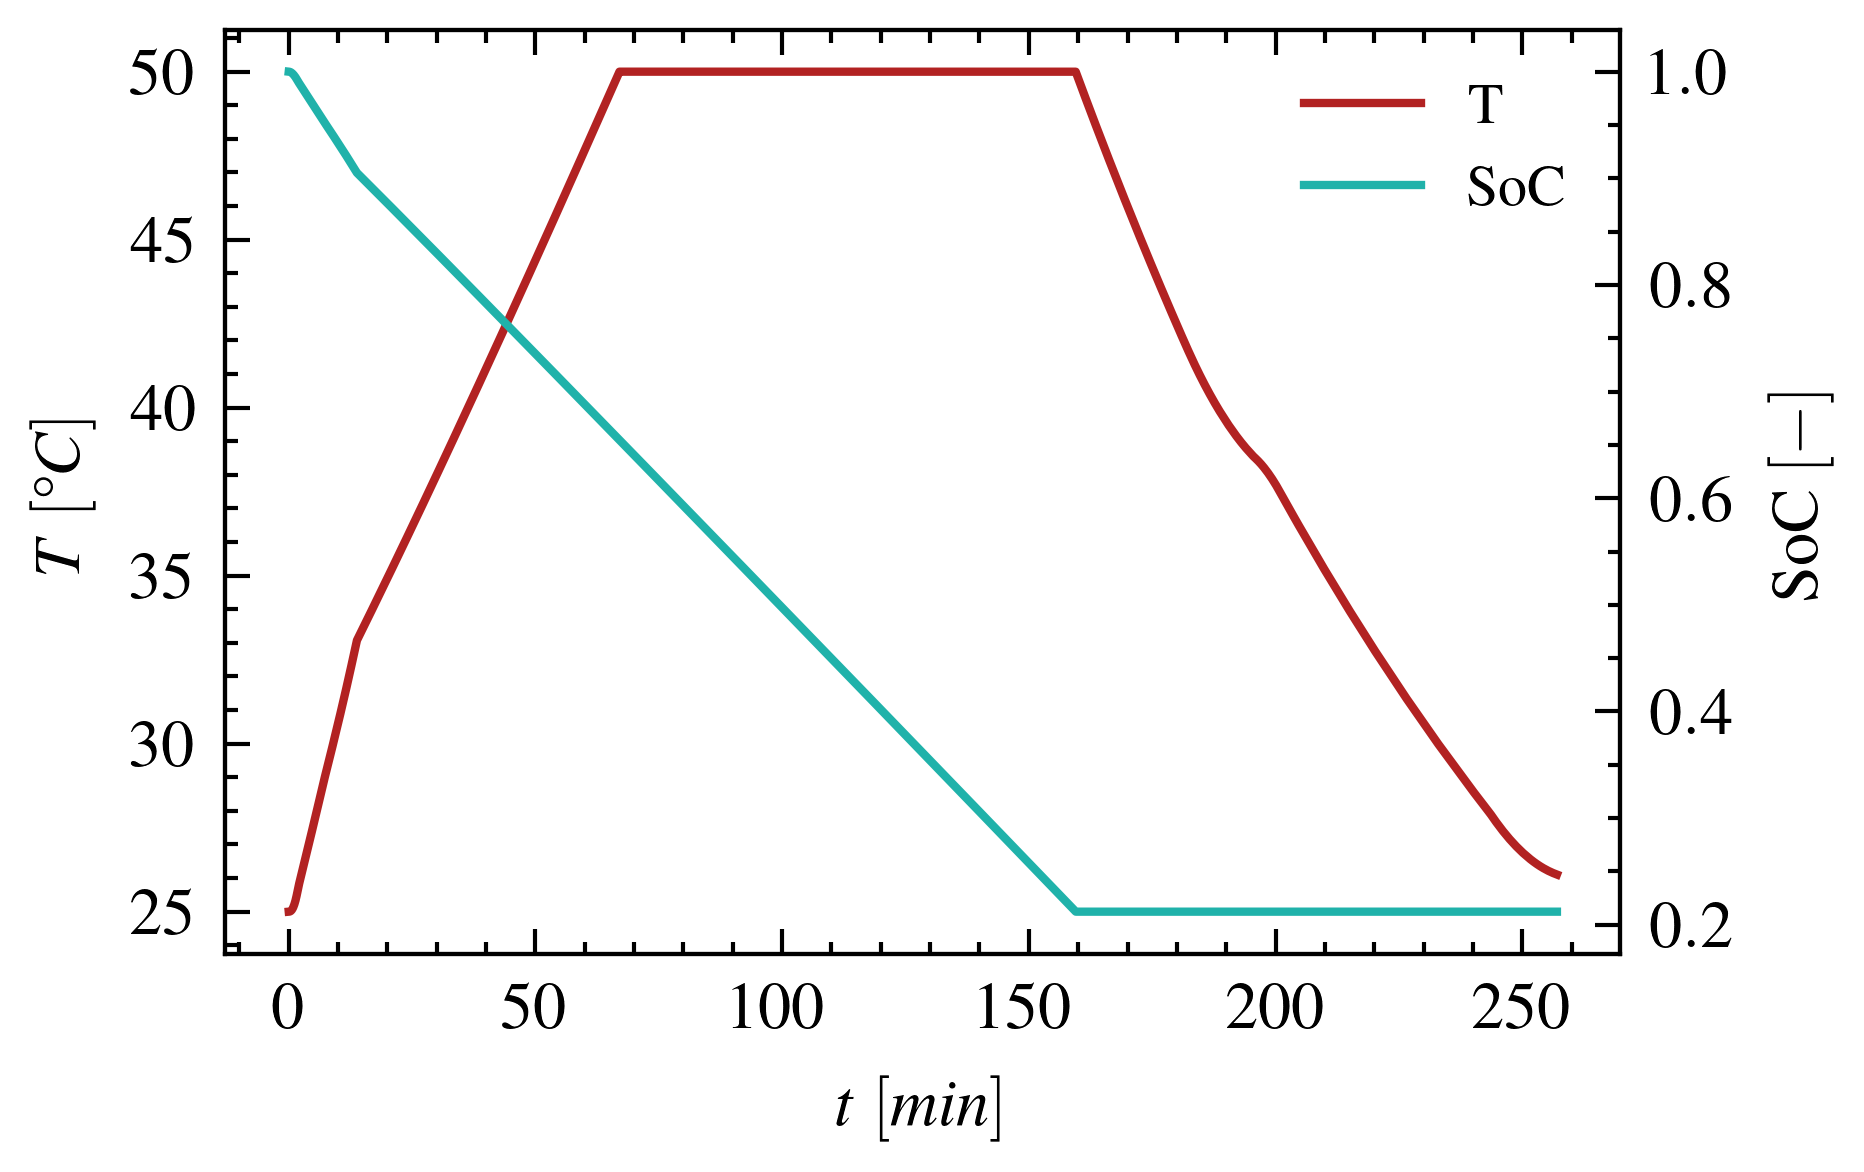

In [55]:
# plt.plot(times,temp-273.15)
# plt.xlabel('Time [s]')
# plt.ylabel('Battery temperature [C]')
# plt.show()

# plt.plot(times,soc)
# plt.xlabel('Time [s]')
# plt.ylabel('SoC [-]')

# Create figure and first axis
fig, ax1 = plt.subplots(figsize=[3,2])

# Plot first variable
line1, = ax1.plot(times/60, temp-273.15, 'firebrick',label='T')
ax1.set_xlabel(r'$t \; [min]$')
ax1.set_ylabel(r'$T \; [\text{°}C]$', color='k')
ax1.tick_params(axis='y', labelcolor='k')

# plt.legend()
# Create second y-axis
ax2 = ax1.twinx()
line2, = ax2.plot(times/60, soc, 'lightseagreen',label='SoC')
ax2.set_ylabel(r"SoC$ \; [-]$", color='k')
ax2.tick_params(axis='y', labelcolor='k')

lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper right',fontsize=7)

plt.savefig('temp_soc.png', dpi=600, bbox_inches='tight')


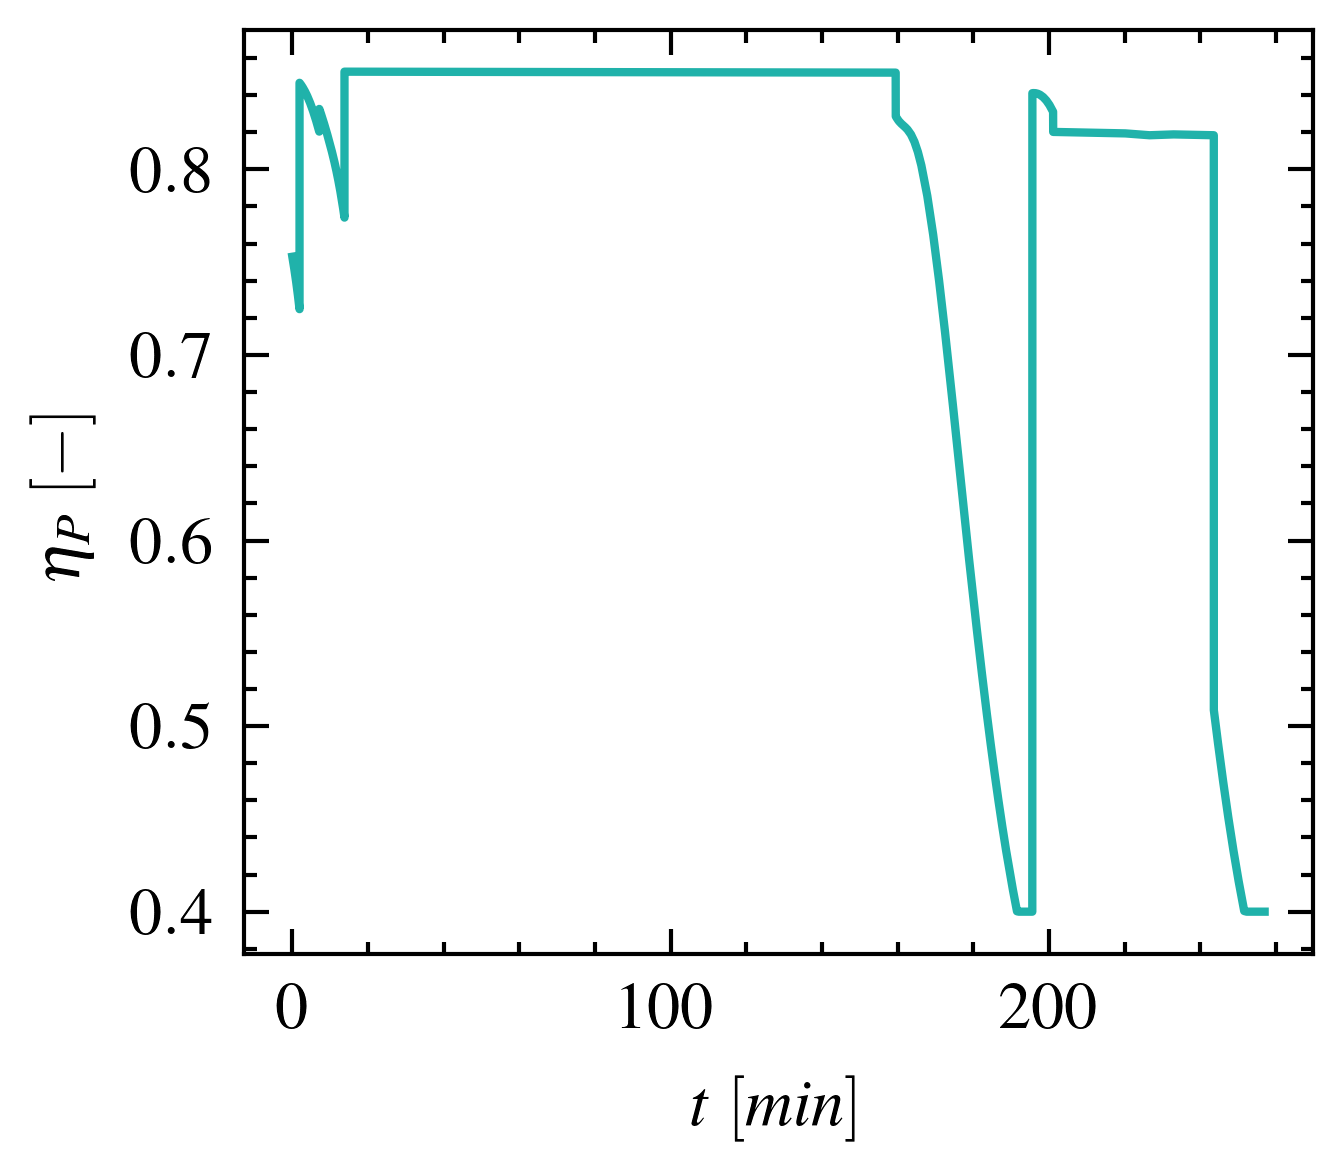

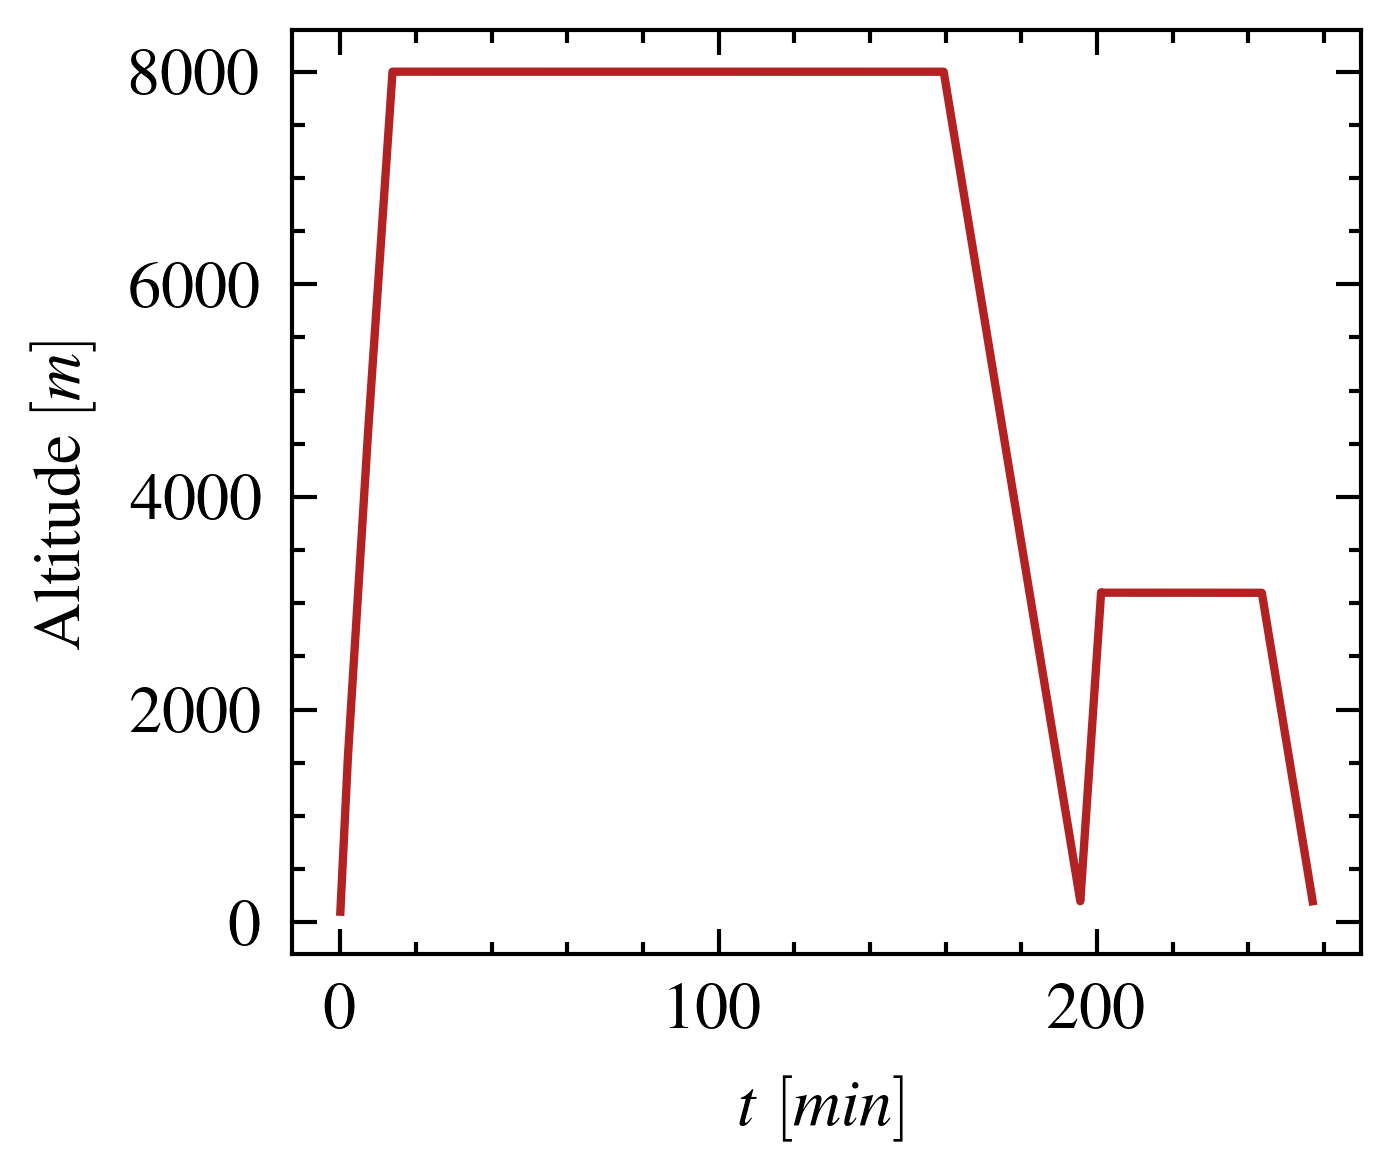

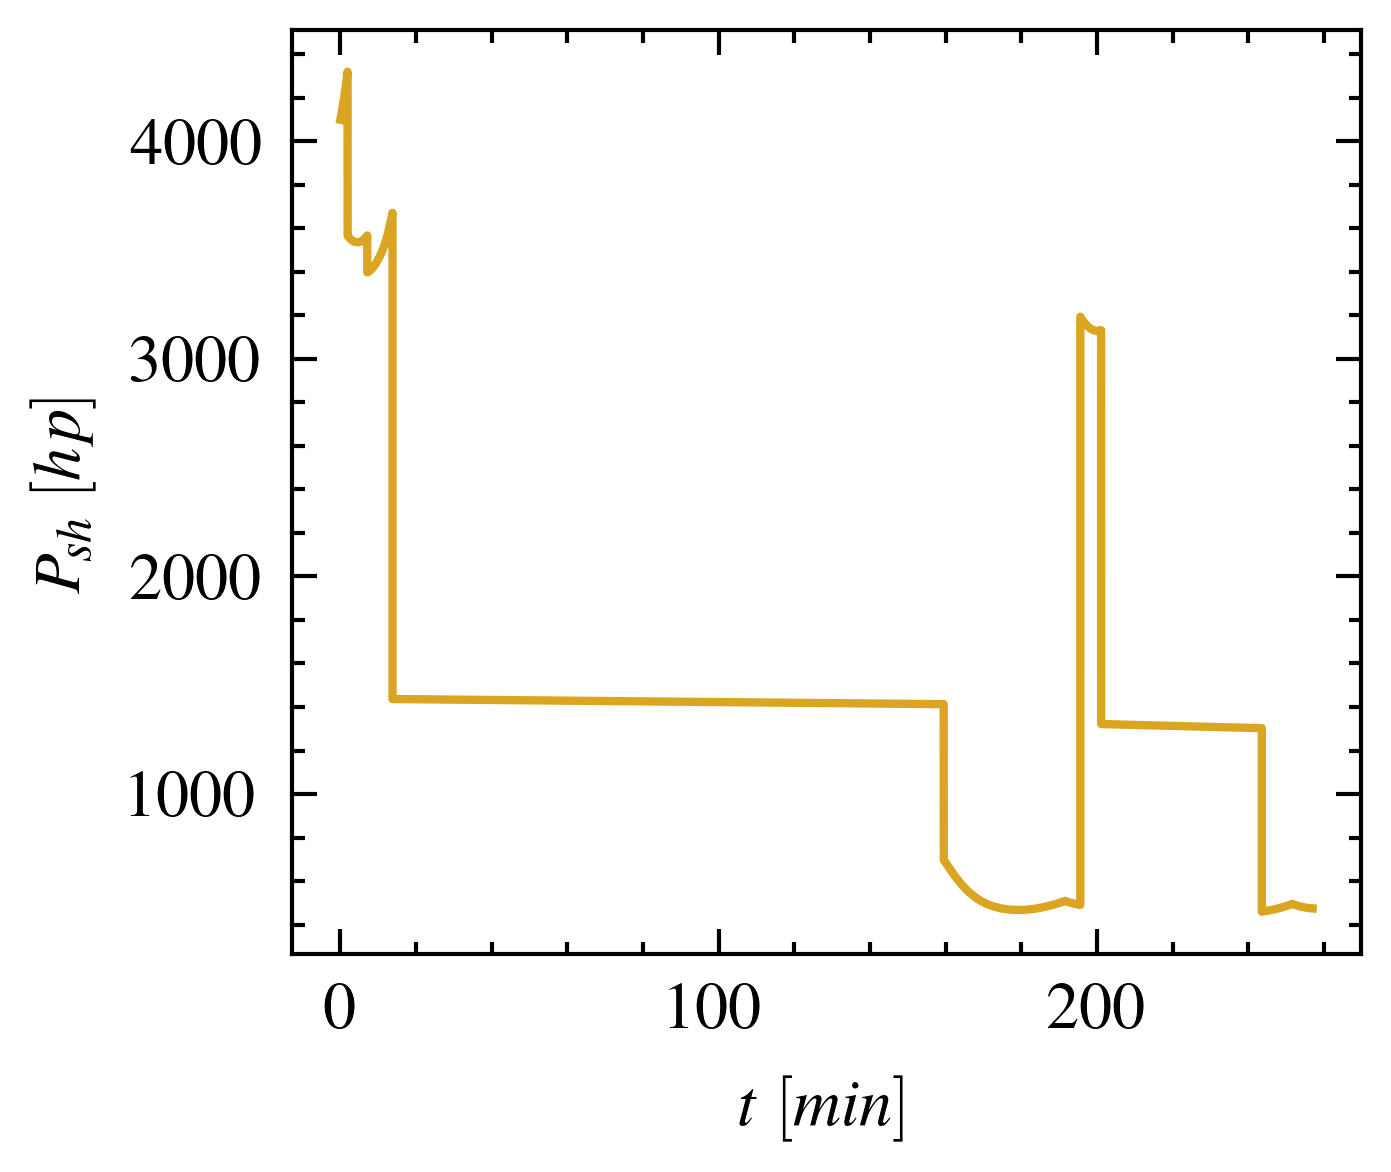

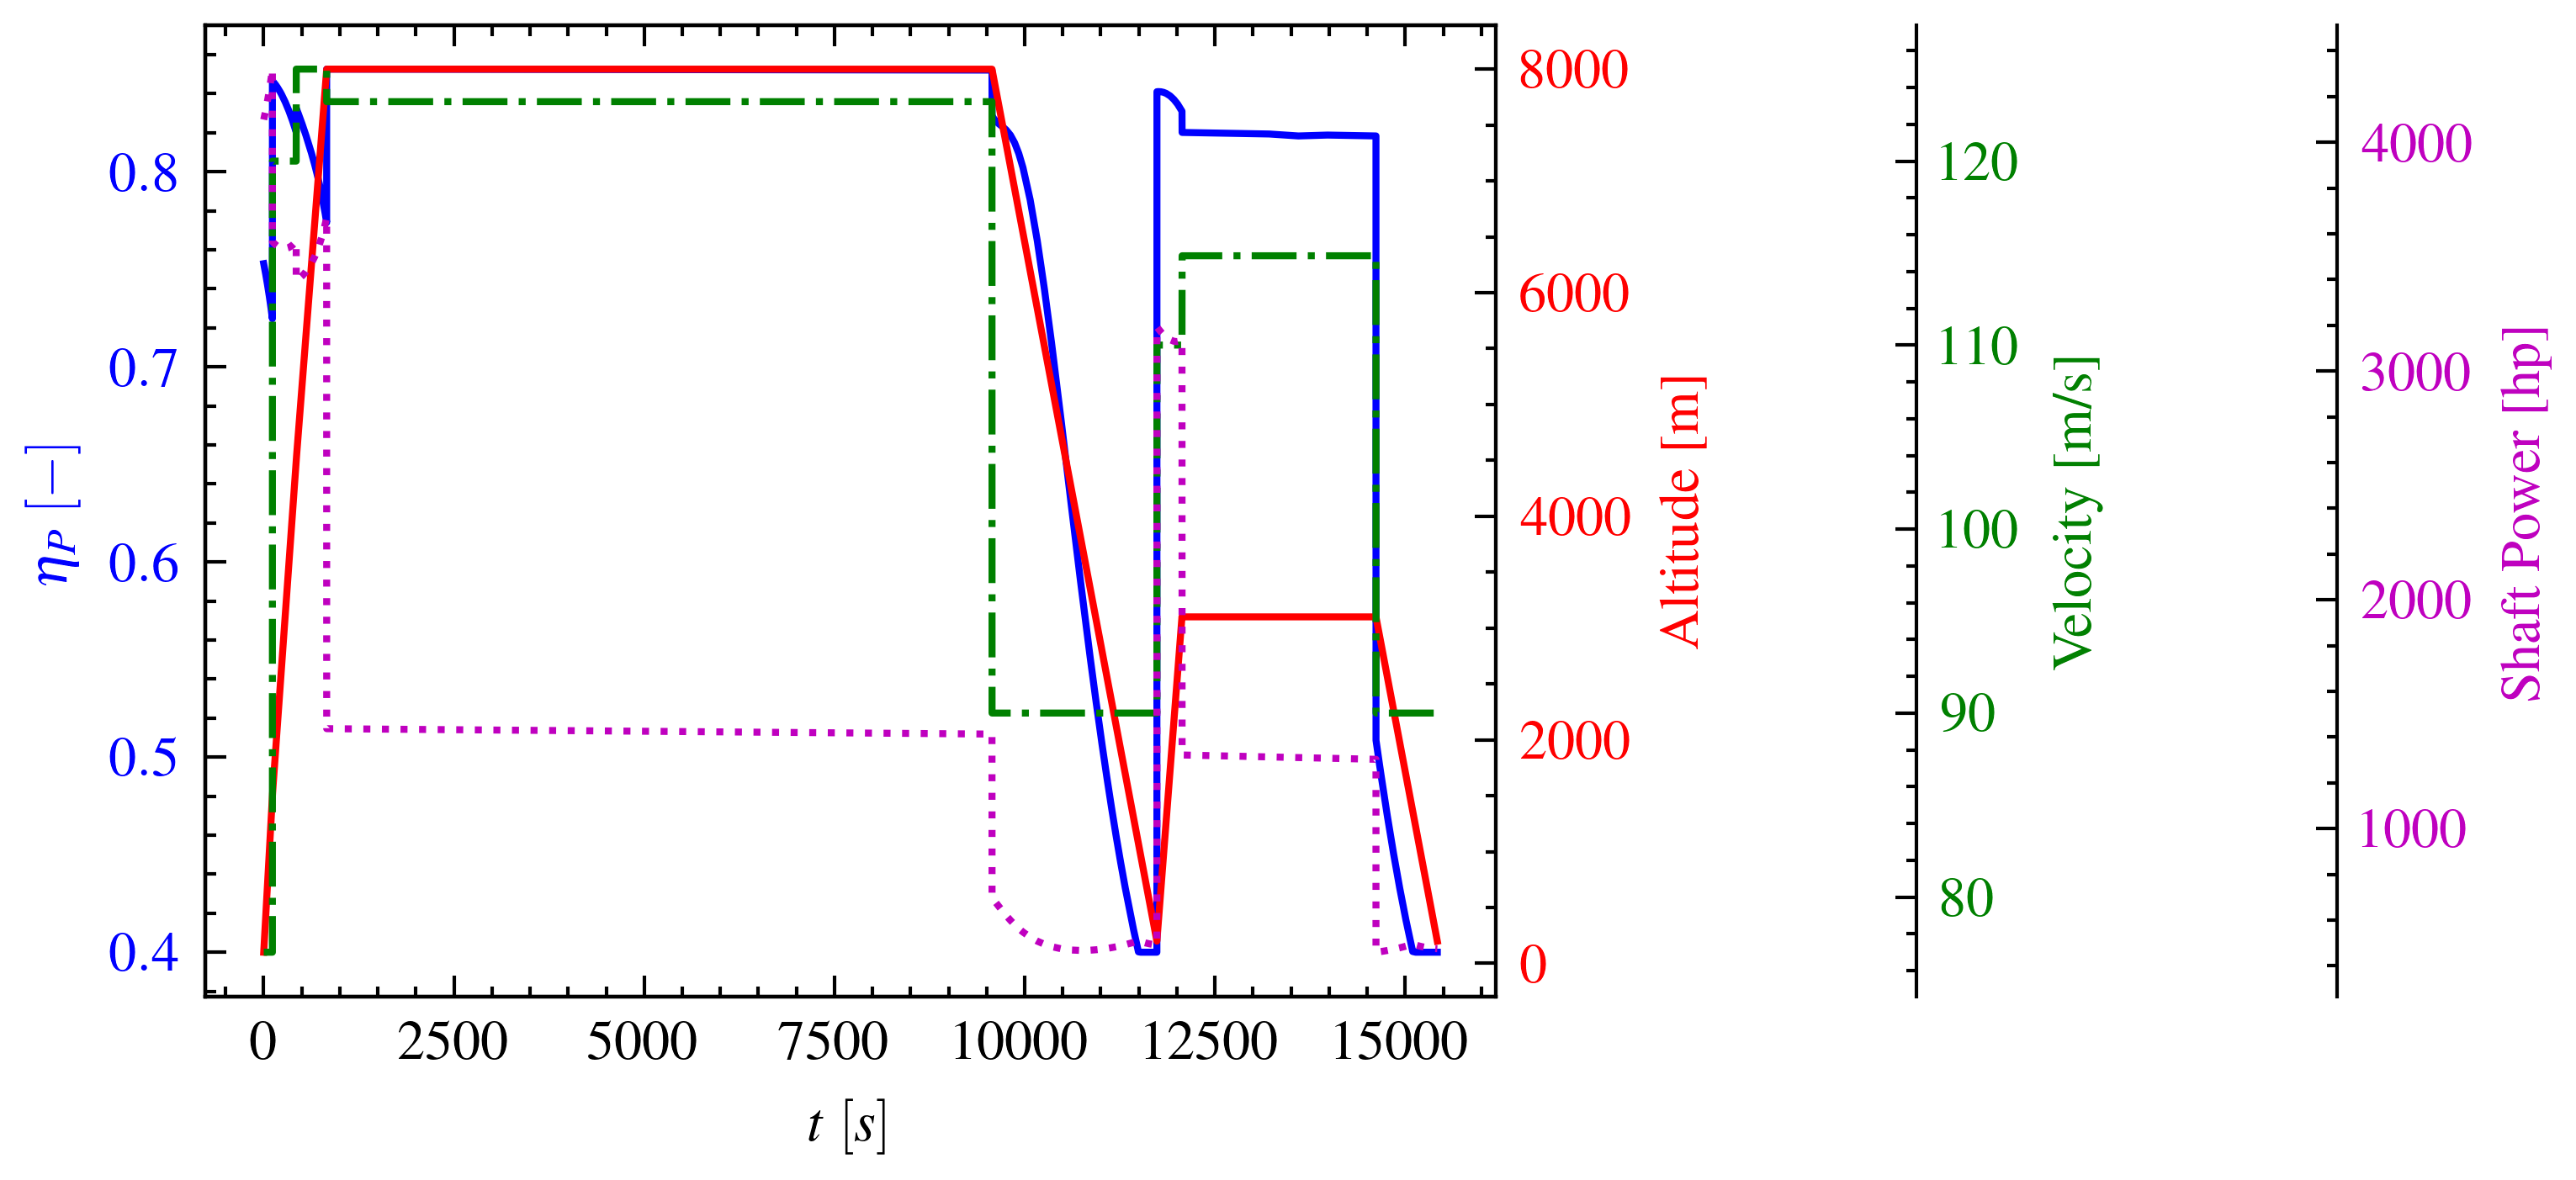

In [24]:
# HAMILTON PROPELLER MODEL


Alt = mission.profile.Altitude(times)
Velocity = mission.profile.Velocity(times) 
PP = [(myaircraft.weight.WTO) * myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS') for t in range(len(times))]
Phi = [mission.profile.SuppliedPowerRatio(t) for t in times]
PRatio = [powertrain.Hybrid(Phi[t],Alt[t],Velocity[t],PP[t]) for t in range(len(times))]


ShaftPower = [Units.wTohp(PP[t]/2)*PRatio[t][3] for t in range(len(times))]

PropEff = [powertrain.Propeller.ComputePropEfficiency(Alt[t],Velocity[t],PP[t]*PRatio[t][3]) for t in range(len(times))]

PropEff = np.array(PropEff)

PropEff[(PropEff > 1.0) | (PropEff < 0.4)] = 0.4

plt.figure(figsize=[2.3,2])
plt.plot(times/60, PropEff,color='lightseagreen')
plt.xlabel(r'$t \; [min]$')
plt.ylabel(r'$\eta_P \; [-]$')
plt.savefig('Prop_eff.png', dpi=600, bbox_inches='tight')


plt.figure(figsize=[2.3,2])
plt.plot(times/60, mission.profile.Altitude(times),color='firebrick')
plt.xlabel(r'$t \; [min]$')
plt.ylabel(r'Altitude$ \; [m]$')
plt.savefig('Altitude.png', dpi=600, bbox_inches='tight')

plt.figure(figsize=[2.3,2])
plt.plot(times/60, ShaftPower,color='goldenrod')
plt.xlabel(r'$t \; [min]$')
plt.ylabel(r'$P_{sh} \; [hp]$')
plt.savefig('ShaftPower.png', dpi=600, bbox_inches='tight')


# Create figure and first axis
fig, ax1 = plt.subplots()

# Plot first variable
ax1.plot(times, PropEff, 'b-')
ax1.set_xlabel(r'$t \; [s]$')
ax1.set_ylabel(r'$\eta_P \; [-]$', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create second y-axis
ax2 = ax1.twinx()
ax2.plot(times, mission.profile.Altitude(times), 'r')
ax2.set_ylabel("Altitude [m]", color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))  # Offset the third axis
ax3.plot(times, Velocity, 'g-.')
ax3.set_ylabel("Velocity [m/s]", color='g')
ax3.tick_params(axis='y', labelcolor='g')

ax4 = ax1.twinx()
ax4.spines["right"].set_position(("outward", 120))  # Offset fourth axis further
ax4.plot(times, ShaftPower, 'm:', label="cos(x)")
ax4.set_ylabel("Shaft Power [hp]", color='m')
ax4.tick_params(axis='y', labelcolor='m')

In [25]:
myaircraft.MissionType = 'Continue'
myaircraft.climateimpact.calculate_mission_emissions()
print(myaircraft.climateimpact.mission_emissions)

myaircraft.climateimpact.ATR()


{'co2': 7378.717102131342, 'h2o': 1984.6284426235563, 'so4': 0.3150203877180248, 'soot': 0.06300407754360497, 'nox': 20.026746145580027}


0.0033031117422463513

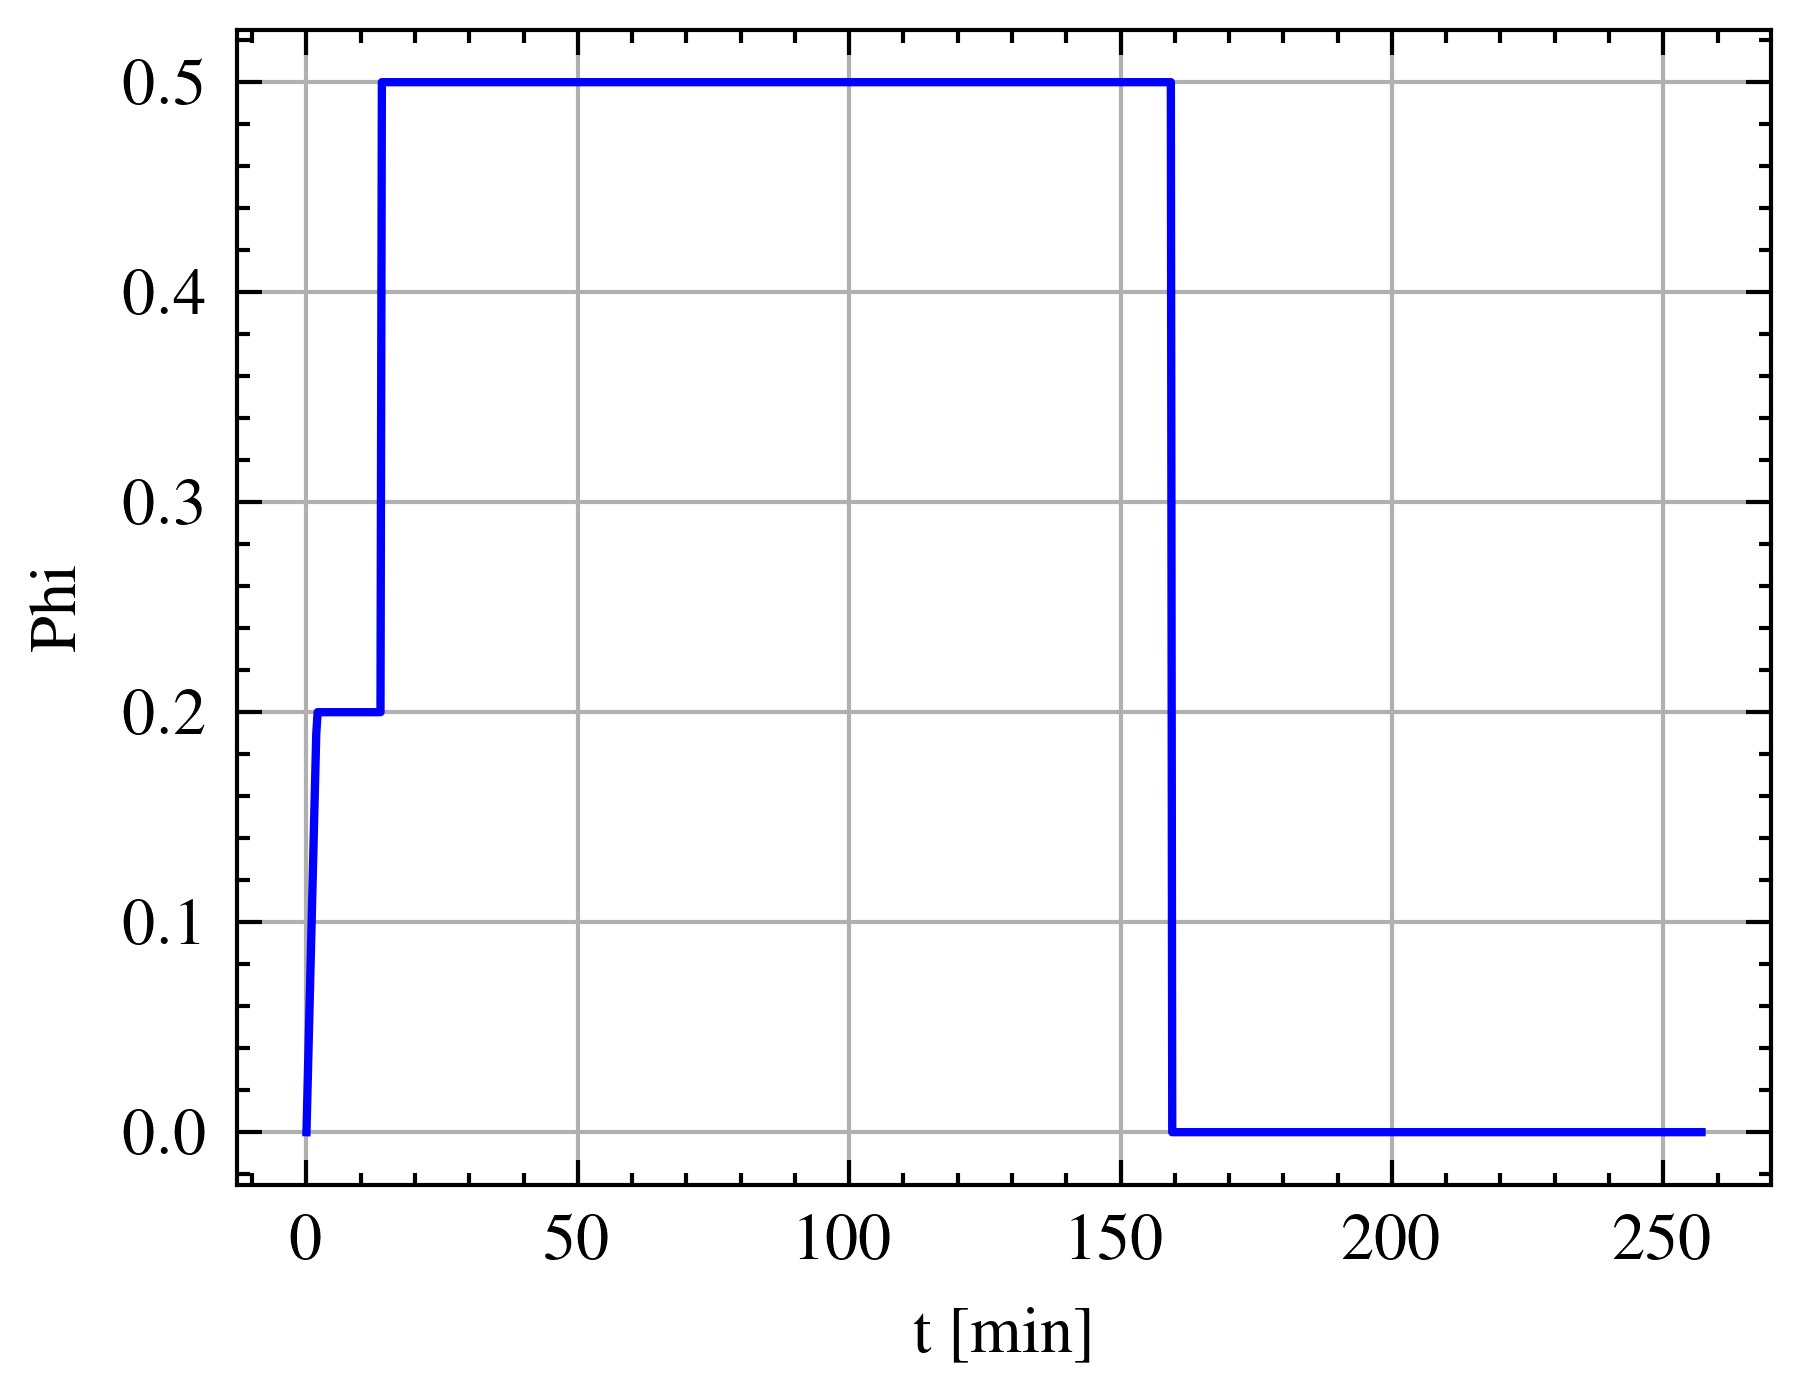

In [26]:
times = np.linspace(0,mission.profile.MissionTime2,num = 1000)
plt.plot(times/60,[mission.profile.SuppliedPowerRatio(t) for t in times], 'b')
#plt.plot(myaircraft.mission.profile.Breaks,np.ones(6)*0.05, '*')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Phi')
plt.show()

In [27]:
times = np.array([])
Ef    = np.array([])
Ebat  = np.array([])
beta  = np.array([])
soc   = np.array([])
for array in mission.integral_solution:
    times = np.concatenate([times, array.t])
    Ef    = np.concatenate([Ef   , array.y[0]])
    Ebat  = np.concatenate([Ebat , array.y[1]])
    beta  = np.concatenate([beta , array.y[2]])

Takeoff propulsive power

In [28]:
myaircraft.performance.TakeOff(myaircraft.DesignWTOoS,myaircraft.constraint.TakeOffConstraints['Beta'], myaircraft.constraint.TakeOffConstraints['Altitude'],myaircraft.constraint.TakeOffConstraints['kTO'], myaircraft.constraint.TakeOffConstraints['sTO'], myaircraft.constraint.DISA, myaircraft.constraint.TakeOffConstraints['Speed'], myaircraft.constraint.TakeOffConstraints['Speed Type'])

194.88837279163596

Maximum mission Propusive Power over Takeoff Mass

In [29]:
max([myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS') for t in range(len(times))])

160.64794796117278

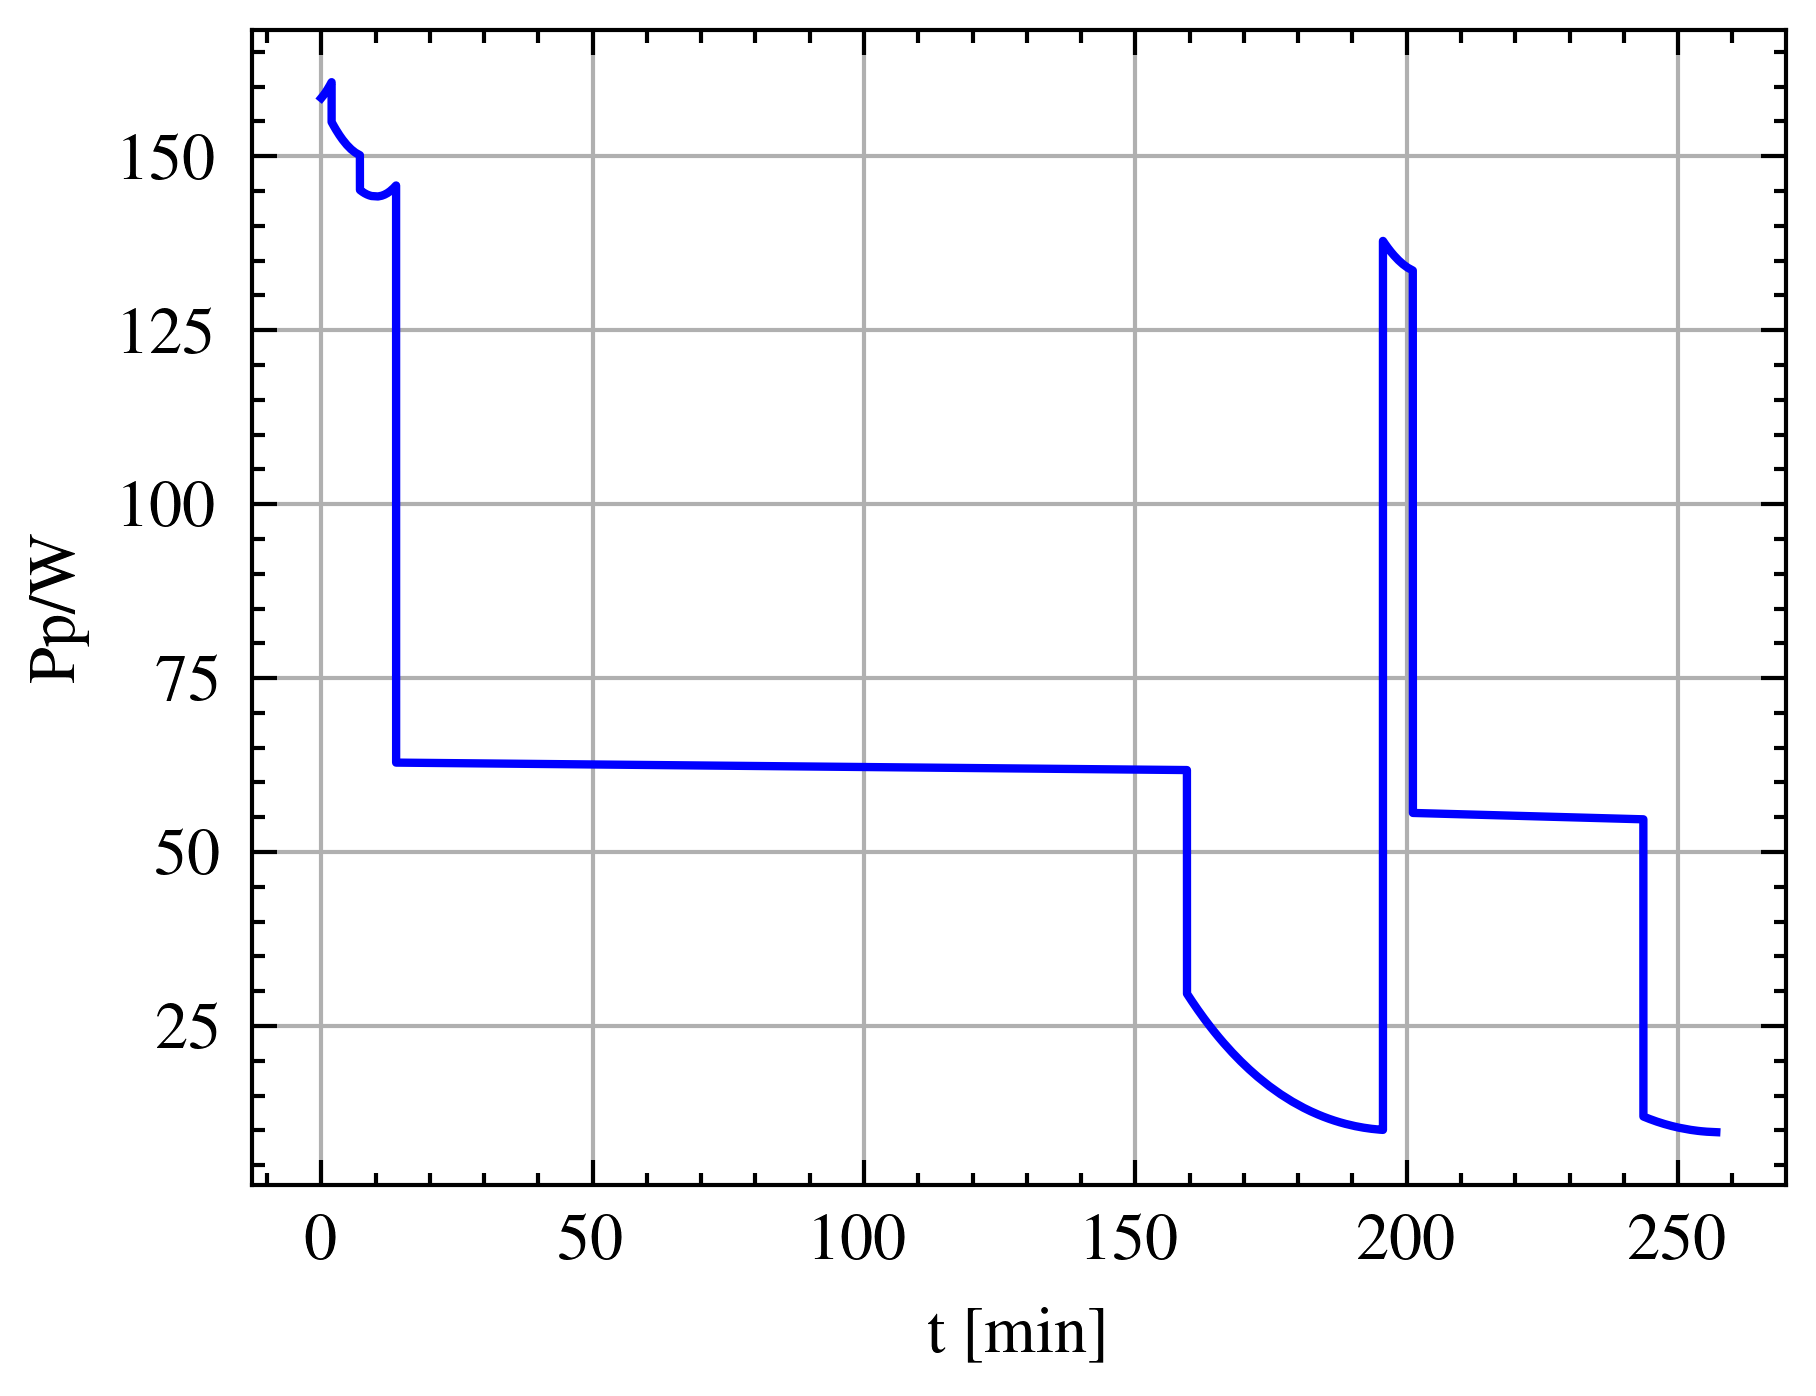

In [30]:
plt.plot(times/60,[myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS') for t in range(len(times))], 'b')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Pp/W')
plt.show()

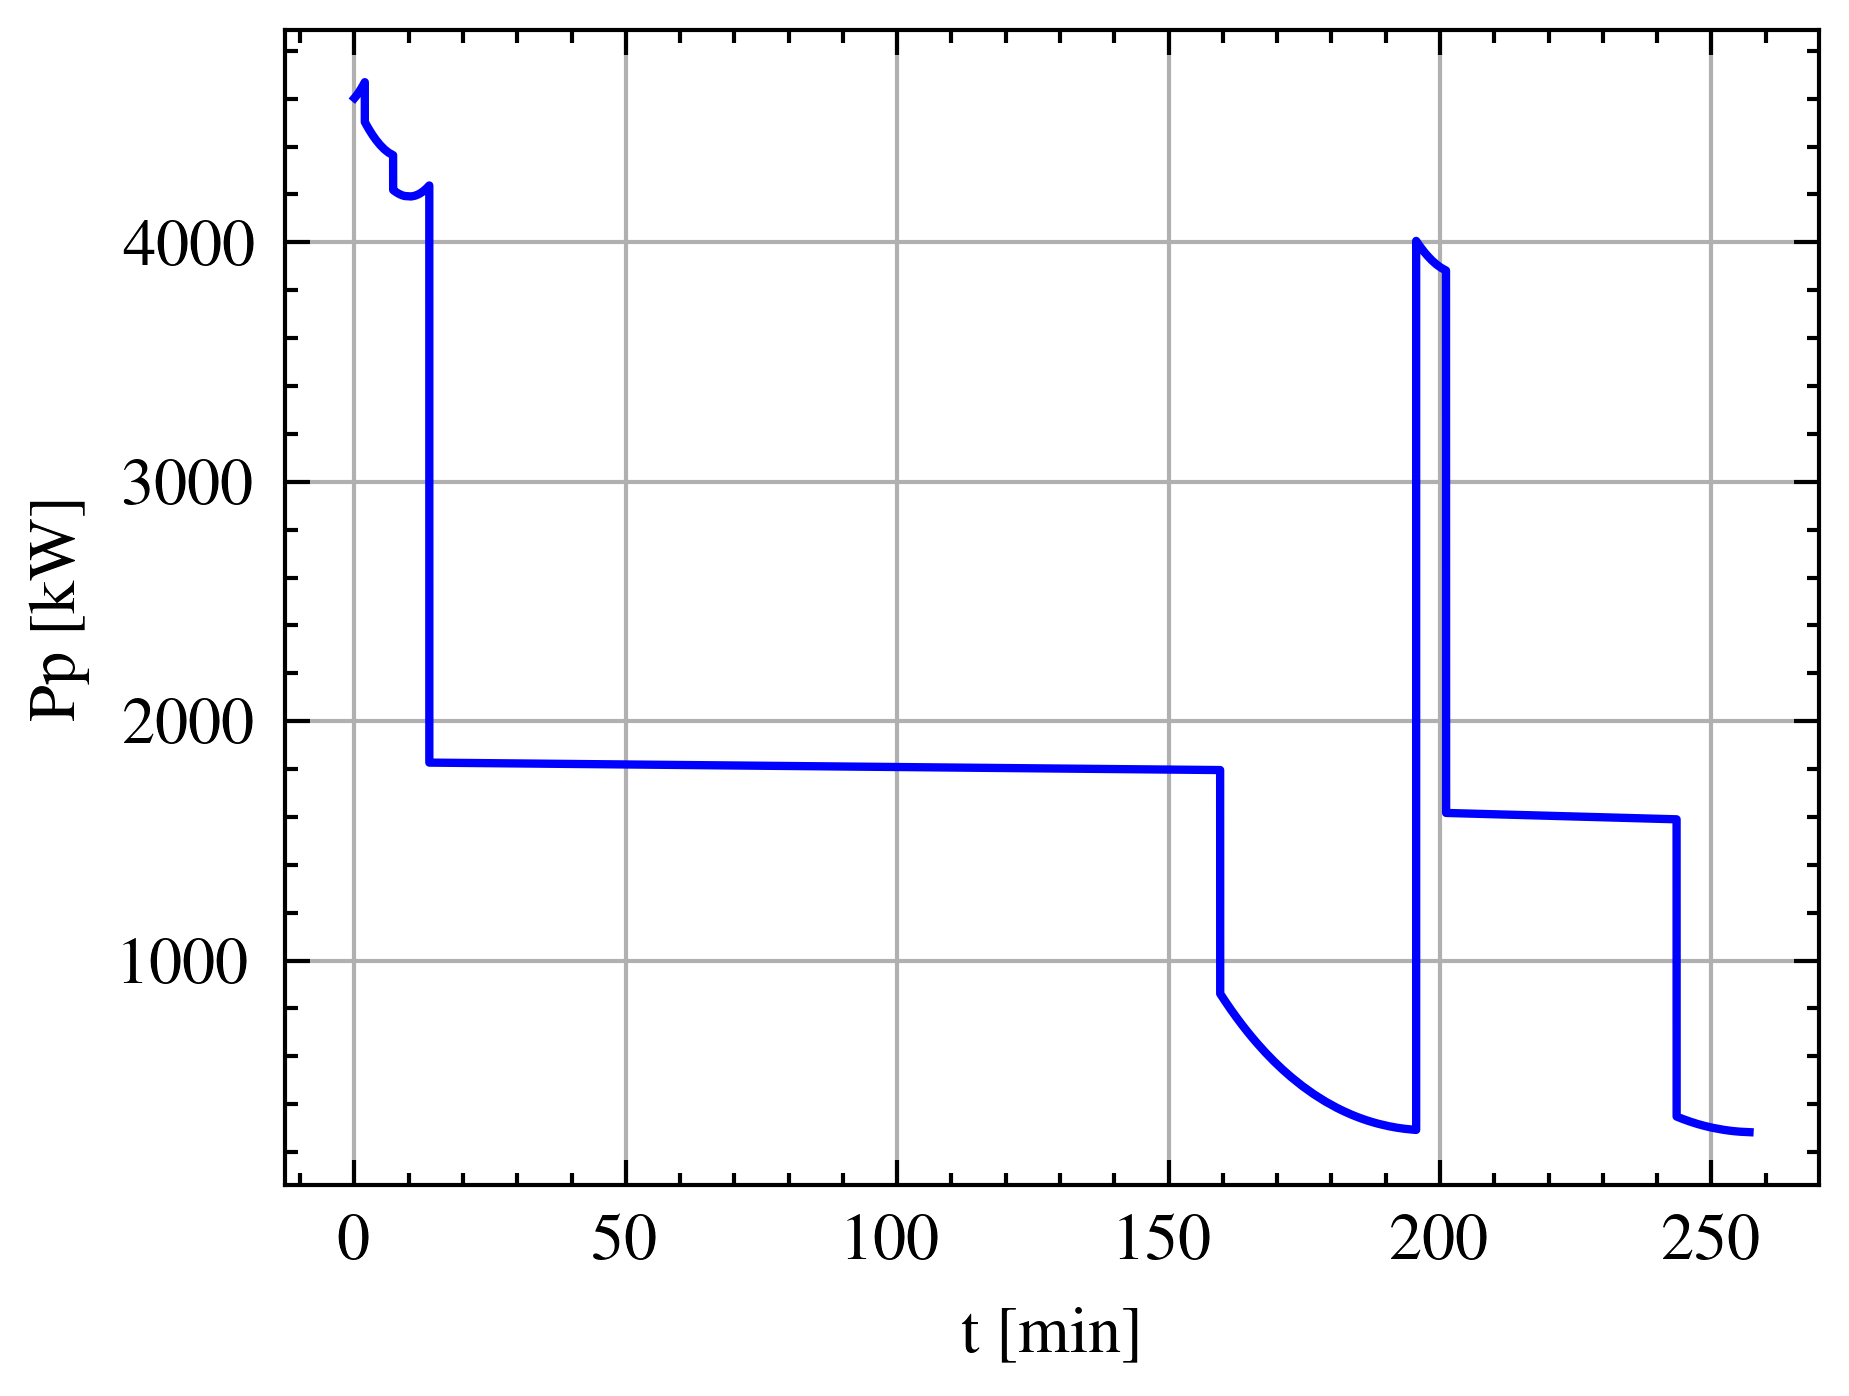

In [31]:
plt.plot(times/60,[(myaircraft.weight.WTO/1000) * myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS') for t in range(len(times))], 'b')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Pp [kW]')
plt.show()

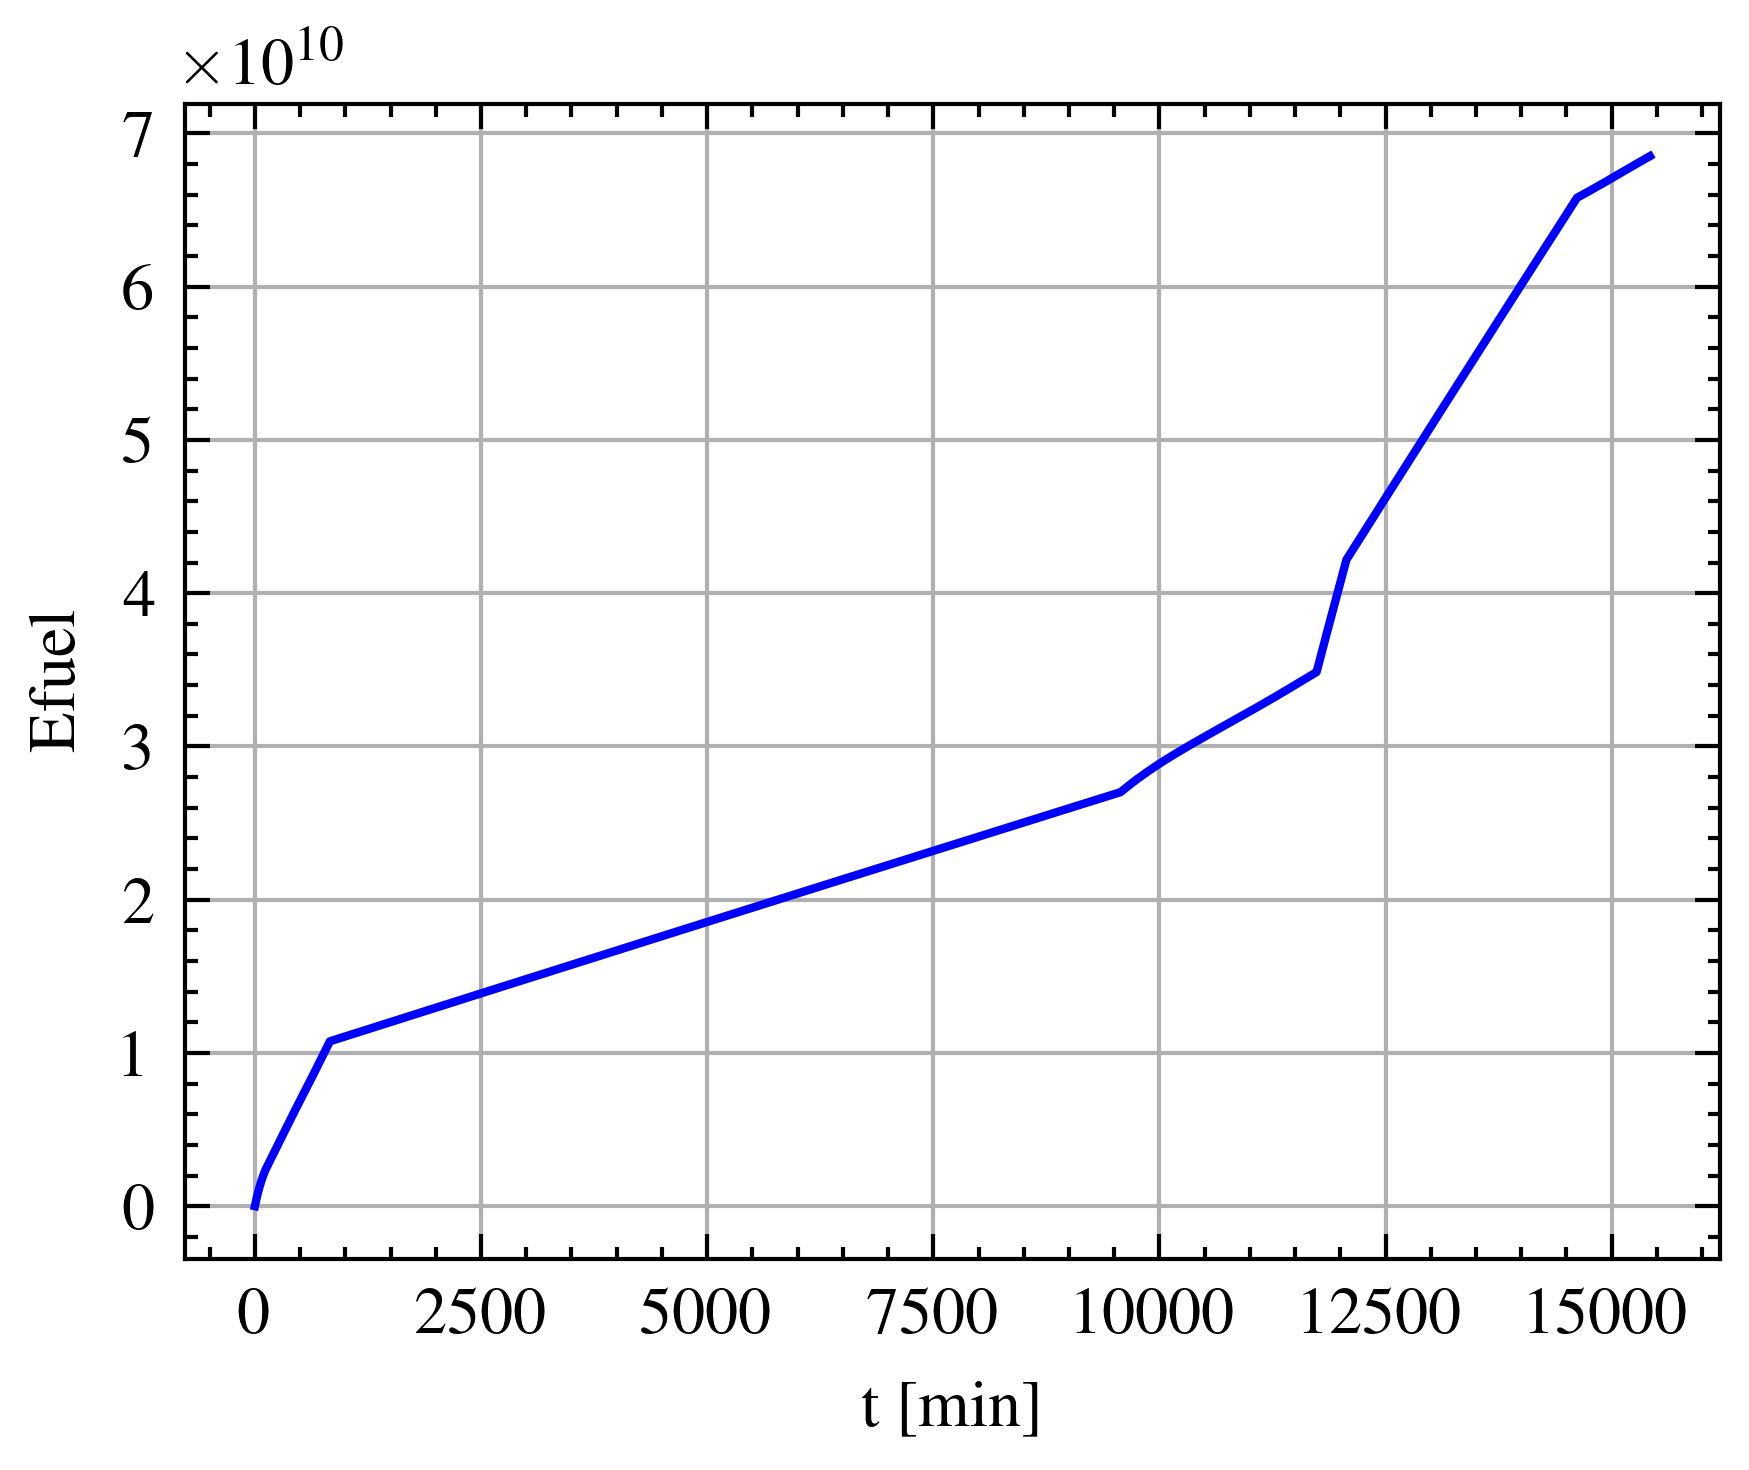

In [32]:
plt.plot(times,Ef, 'b')
#plt.plot(myaircraft.mission.profile.Breaks,np.ones(6)*0.05, '*')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Efuel')
plt.show()

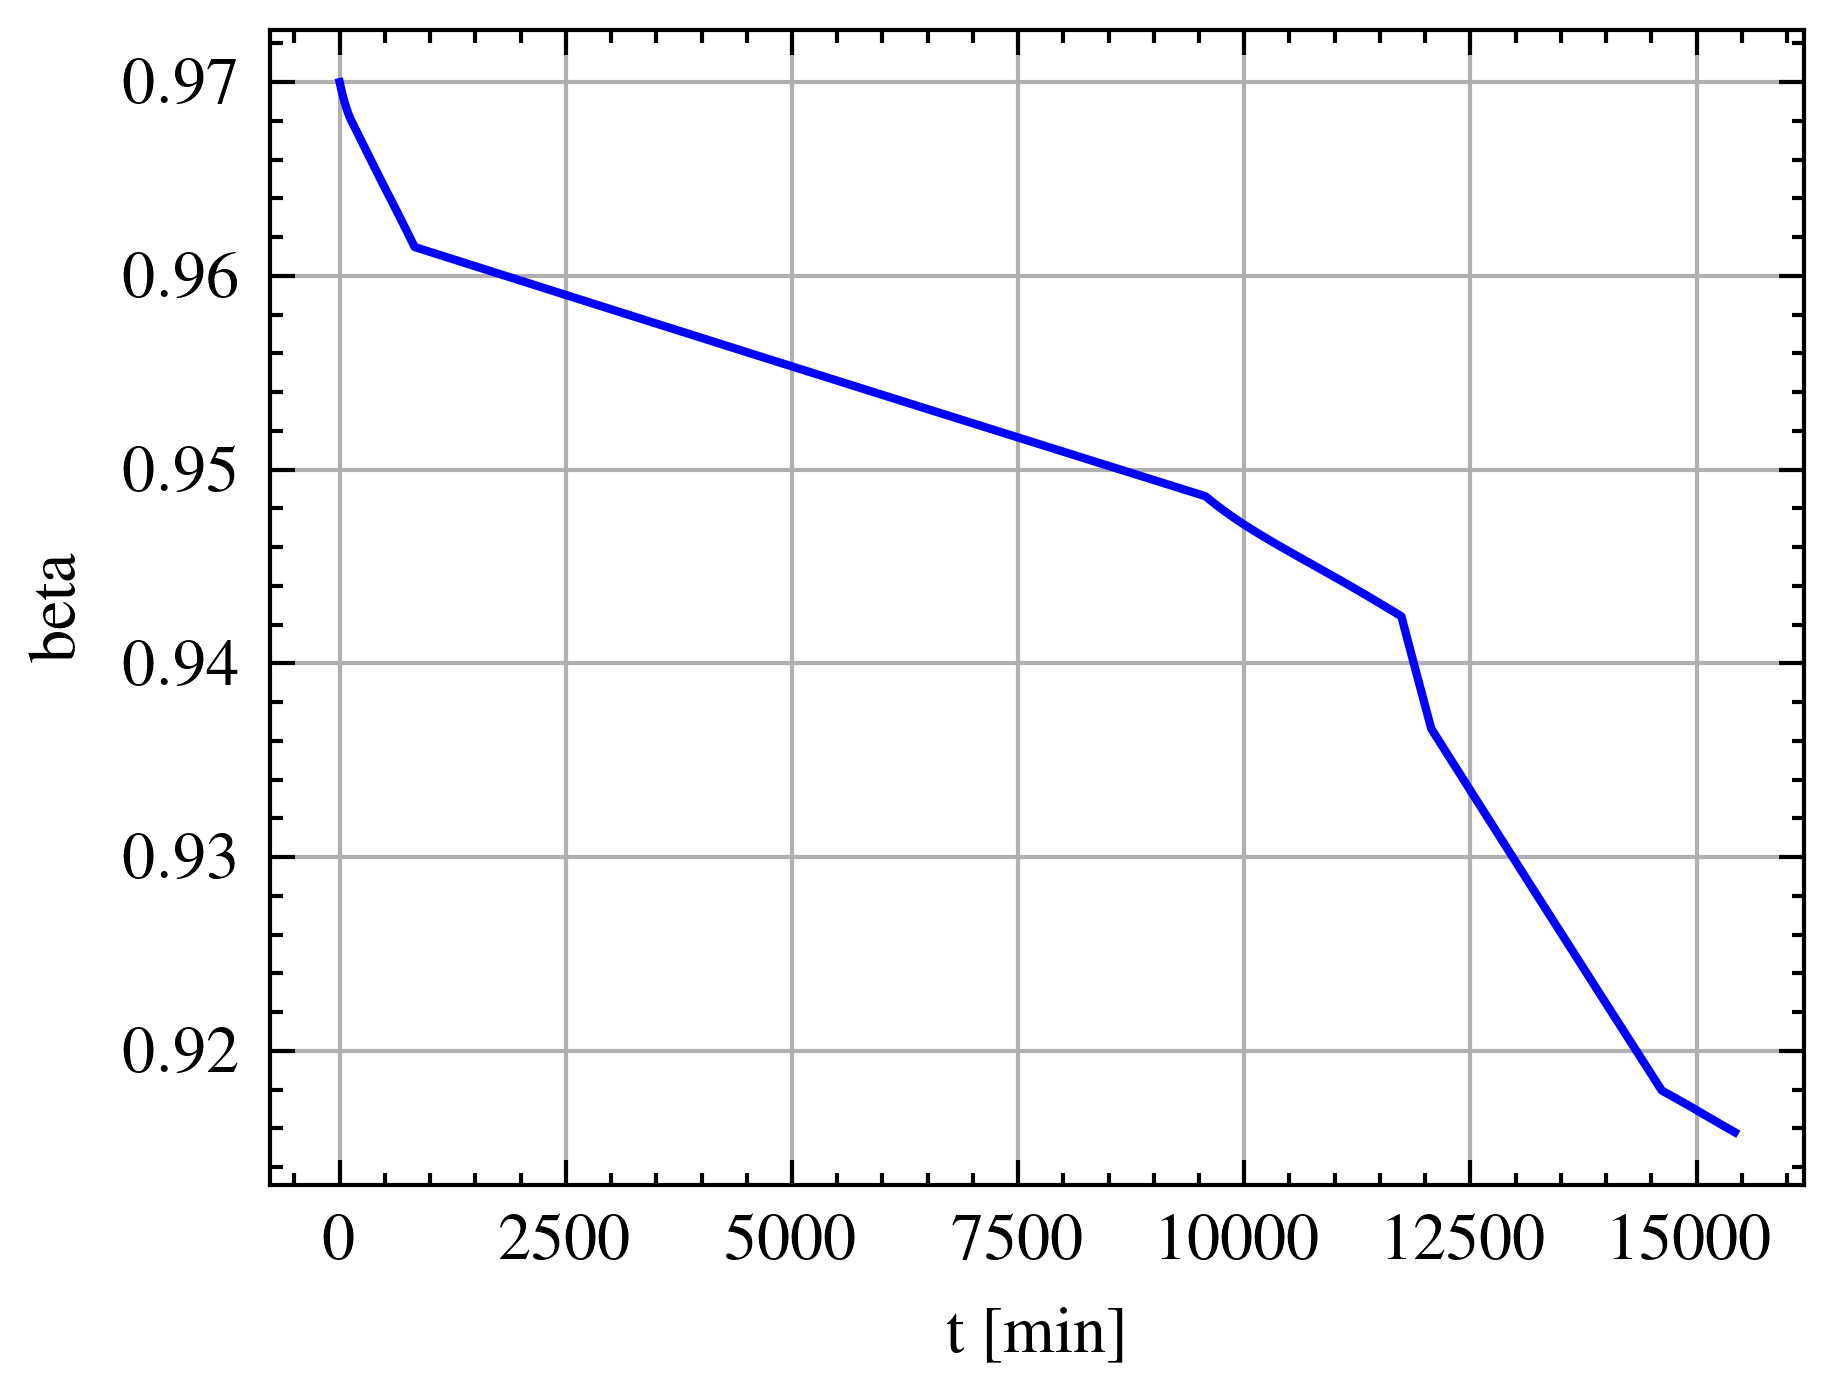

In [33]:
plt.plot(times,beta, 'b')
#plt.plot(myaircraft.mission.profile.Breaks,np.ones(6)*0.05, '*')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('beta')
plt.show()

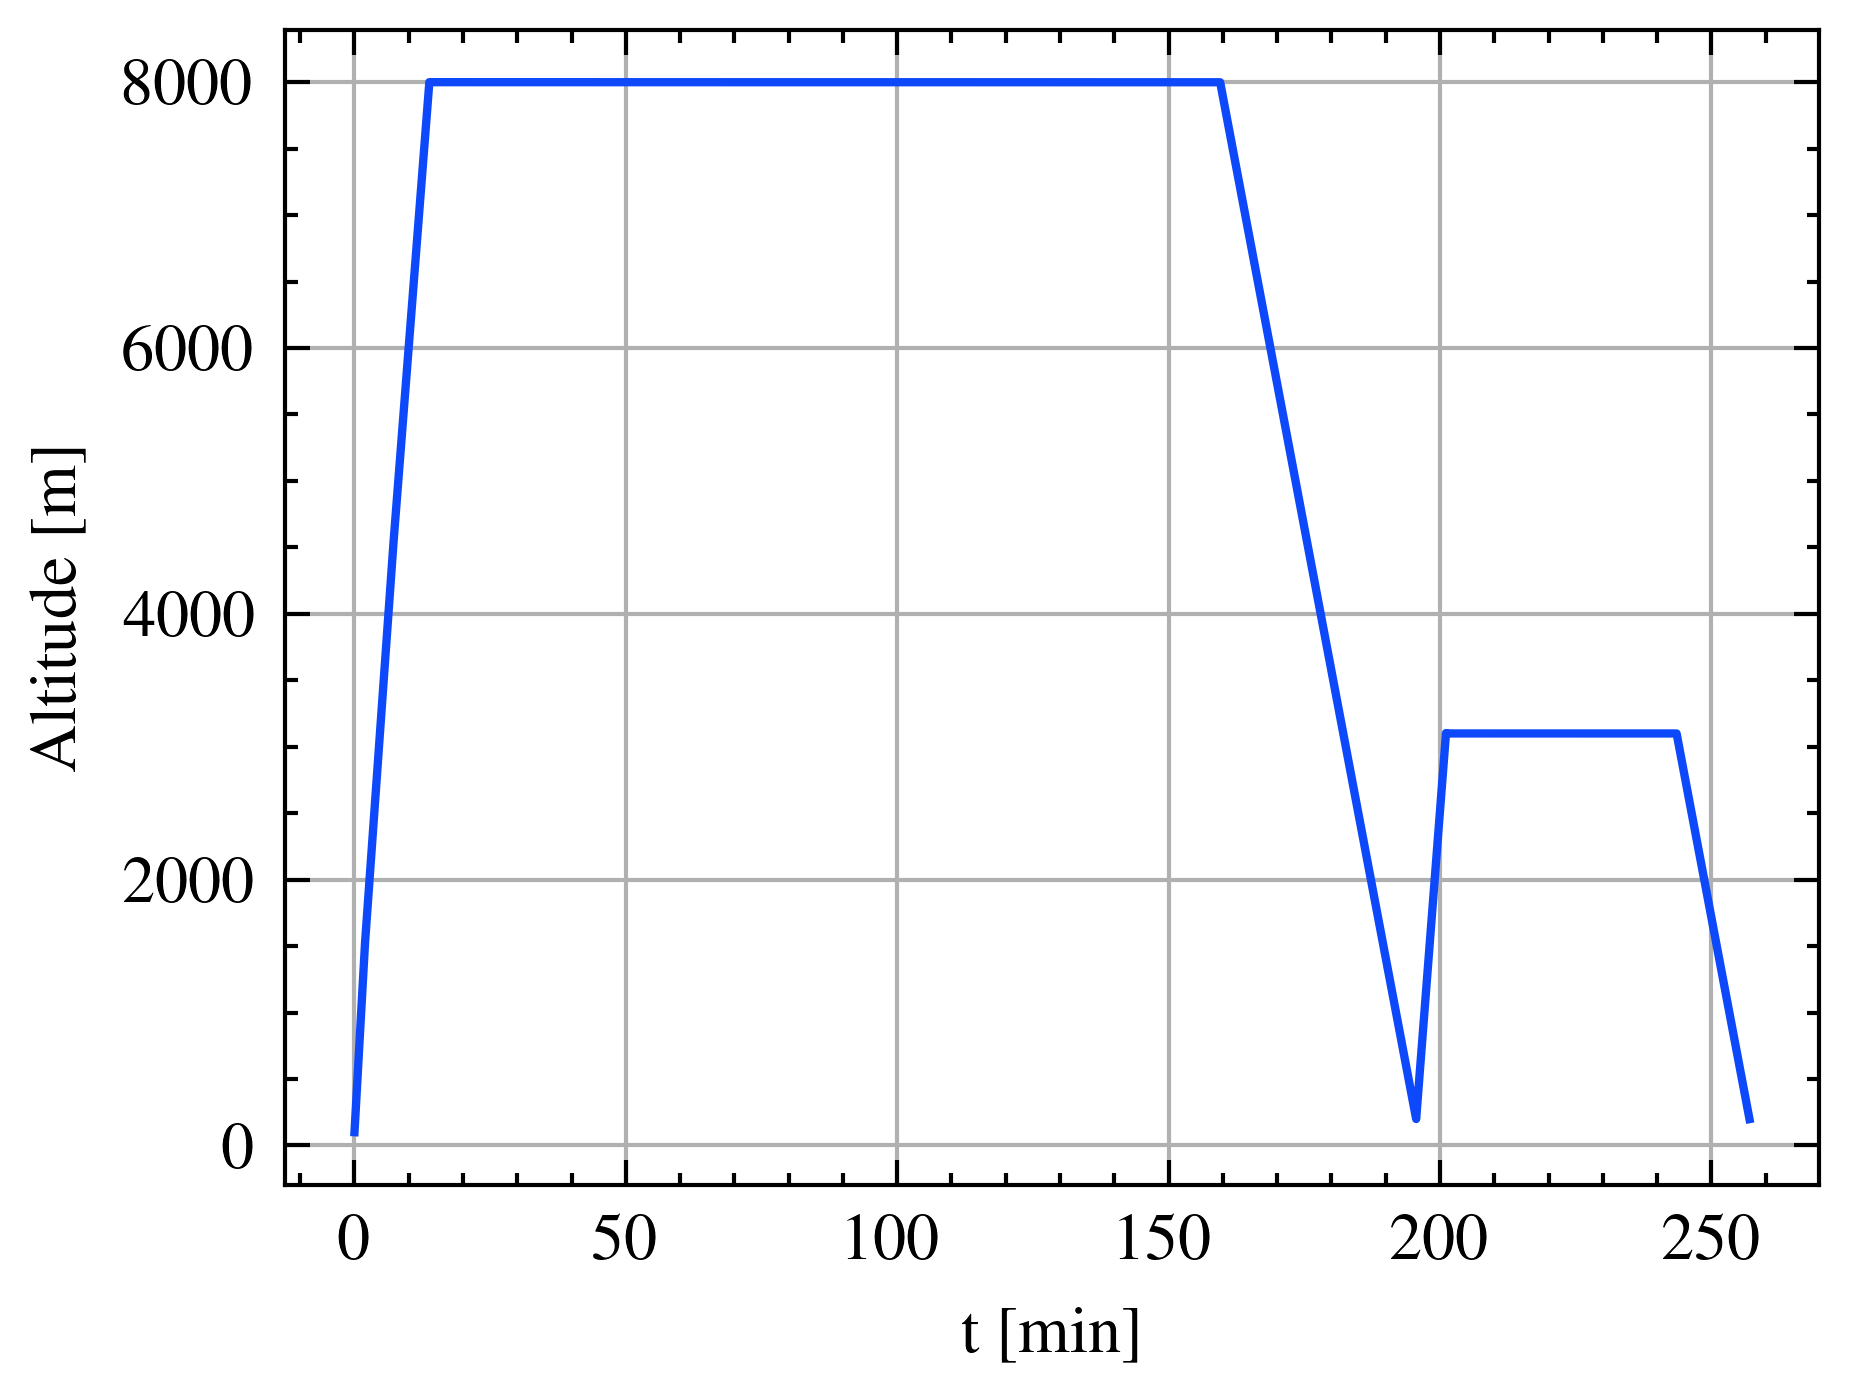

In [34]:
plt.plot(times/60,mission.profile.Altitude(times))
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Altitude [m]')
plt.show()
